In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.optim as optim
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.svm import SVR

In [71]:
t_c_raw = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u_raw = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c_raw)
t_u = torch.tensor(t_u_raw)

In [72]:
def linear_model(t_u, w, b):
  return w*t_u +  b

def quadratic_model(t_u, w2, w1, b):
  return (w2*t_u)**2 + (w1*t_u)**2 +  b

# t_p = predictions, t_c = ground truths
def loss_fn(t_p, t_c):
  squared_diffs = (t_p - t_c)**2
  return squared_diffs.mean()

def training_loop(n_epochs, model, optimizer, params, t_u, t_c):
  for epoch in range(1, n_epochs + 1):
    t_p = model(t_u, *params)
    loss = loss_fn(t_p, t_c)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 500 == 0 or epoch == 1:
      print('Epoch %d, Loss %f' % (epoch, float(loss)))

  return params

In [73]:
learning_rate = [1e0, 1e-1, 1e-2, 1e-3, 1e-4]
# learning_rate = [1e0]
final_loss = []
t_ps = []

for lr in learning_rate:
  print(f'Learning rate: {lr}')
  model = quadratic_model
  params = torch.tensor(np.ones((3,1)), requires_grad=True)
  optimizer = optim.Adam([params], lr=lr)
  params = training_loop(5000, model, optimizer, params, t_u, t_c)

  t_p = quadratic_model(t_u, *params)
  t_ps.append(t_p)
  loss = loss_fn(t_p, t_c)
  final_loss.append(loss.detach().numpy())
  print()

print(f'Learning rate: 1e0')
model = linear_model
params = torch.tensor(np.ones((2,1)), requires_grad=True)
optimizer = optim.Adam([params], lr=1e0)
params = training_loop(5000, model, optimizer, params, t_u, t_c)

t_p_l = linear_model(t_u, *params)
loss = loss_fn(t_p_l, t_c)
linear_loss = loss.detach().numpy()
print()

Learning rate: 1.0
Epoch 1, Loss 45594787.736440
Epoch 500, Loss 63.980121
Epoch 1000, Loss 32.234560
Epoch 1500, Loss 12.589210
Epoch 2000, Loss 4.863224
Epoch 2500, Loss 2.968491
Epoch 3000, Loss 2.701118
Epoch 3500, Loss 2.681979
Epoch 4000, Loss 2.681397
Epoch 4500, Loss 2.681391
Epoch 5000, Loss 2.681391

Learning rate: 0.1
Epoch 1, Loss 45594787.736440
Epoch 500, Loss 5.058848
Epoch 1000, Loss 4.218810
Epoch 1500, Loss 4.040524
Epoch 2000, Loss 3.827470
Epoch 2500, Loss 3.593775
Epoch 3000, Loss 3.357393
Epoch 3500, Loss 3.138764
Epoch 4000, Loss 2.957022
Epoch 4500, Loss 2.824625
Epoch 5000, Loss 2.742930

Learning rate: 0.01
Epoch 1, Loss 45594787.736440
Epoch 500, Loss 21528.203456
Epoch 1000, Loss 2136.730671
Epoch 1500, Loss 417.591224
Epoch 2000, Loss 101.615399
Epoch 2500, Loss 27.632278
Epoch 3000, Loss 9.728647
Epoch 3500, Loss 5.874368
Epoch 4000, Loss 5.215224
Epoch 4500, Loss 5.101516
Epoch 5000, Loss 5.035704

Learning rate: 0.001
Epoch 1, Loss 45594787.736440
Epoch 

In [74]:
print("Final loss for the linear model using Adam optimizer was 2.927648 in the lecture 12 slides")
print("\nNonlinear model final losses:")
for i in range(0, len(final_loss)):
  print(f'{learning_rate[i]:.2e} learning rate: {final_loss[i]}')

Final loss for the linear model using Adam optimizer was 2.927648 in the lecture 12 slides

Nonlinear model final losses:
1.00e+00 learning rate: 2.681390586791368
1.00e-01 learning rate: 2.742812543552537
1.00e-02 learning rate: 5.035563802413372
1.00e-03 learning rate: 4540.802374816841
1.00e-04 learning rate: 6057403.528961799


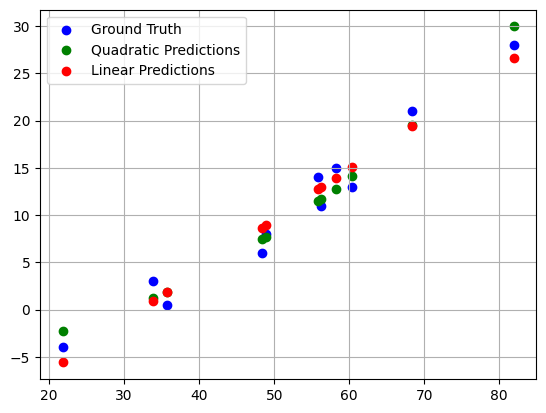

In [75]:
t_p_q = t_ps[0].detach().numpy()
t_p_l = t_p_l.detach().numpy()

plt.scatter(t_u_raw, t_c_raw, label='Ground Truth', color='blue')
plt.scatter(t_u_raw, t_p_q, label='Quadratic Predictions', color='green')
plt.scatter(t_u_raw, t_p_l, label='Linear Predictions', color='red')

# plt.xlabel('Input (t_u)')
# plt.ylabel('Temperature (°C)')
# plt.title('Model Predictions vs Ground Truth')
plt.legend()
plt.grid(True)
plt.show()

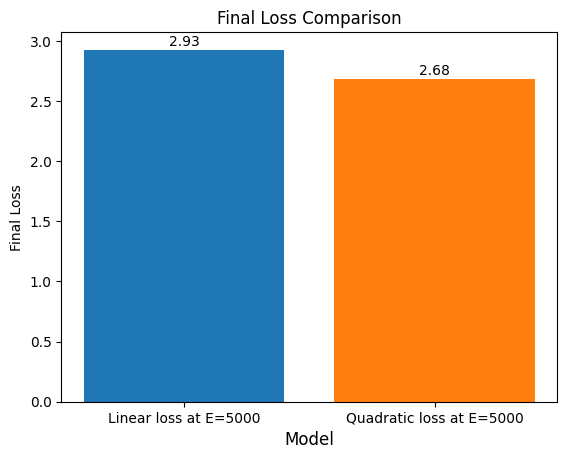

In [76]:
plt.bar("Linear loss at E=5000", linear_loss)
plt.bar("Quadratic loss at E=5000", final_loss[0])
plt.ylabel('Final Loss')
plt.xlabel('Model', fontsize=12)
plt.title('Final Loss Comparison')

for i, loss in enumerate([linear_loss, final_loss[0]]):
    plt.text(i, loss + 0.01, f'{loss:.2f}', ha='center', va='bottom', fontsize=10)

plt.show()